In [1]:
import pandas as pd
df = pd.read_csv("/kaggle/input/clicks-conversion-tracking/KAG_conversion_data.csv")

In [2]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [3]:
import numpy as np
df["CTR"] = df["Clicks"]/df["Impressions"] * 100 #click through rate
df["CPC"] = df["Spent"] /df["Clicks"] # cost per click
df["CR"] = df["Approved_Conversion"] / df["Clicks"]
df["CCR"] = df['Approved_Conversion'] / df['Total_Conversion']
df = df.replace(np.nan, 0)
df = df.replace(np.inf, np.nan)
df = df.dropna()

In [4]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,CR,CCR
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.013605,1.43,1.0,0.5
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.011198,0.91,0.0,0.0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,0.00,0.0,0.0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.023480,1.25,0.0,0.0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.024195,1.29,1.0,1.0


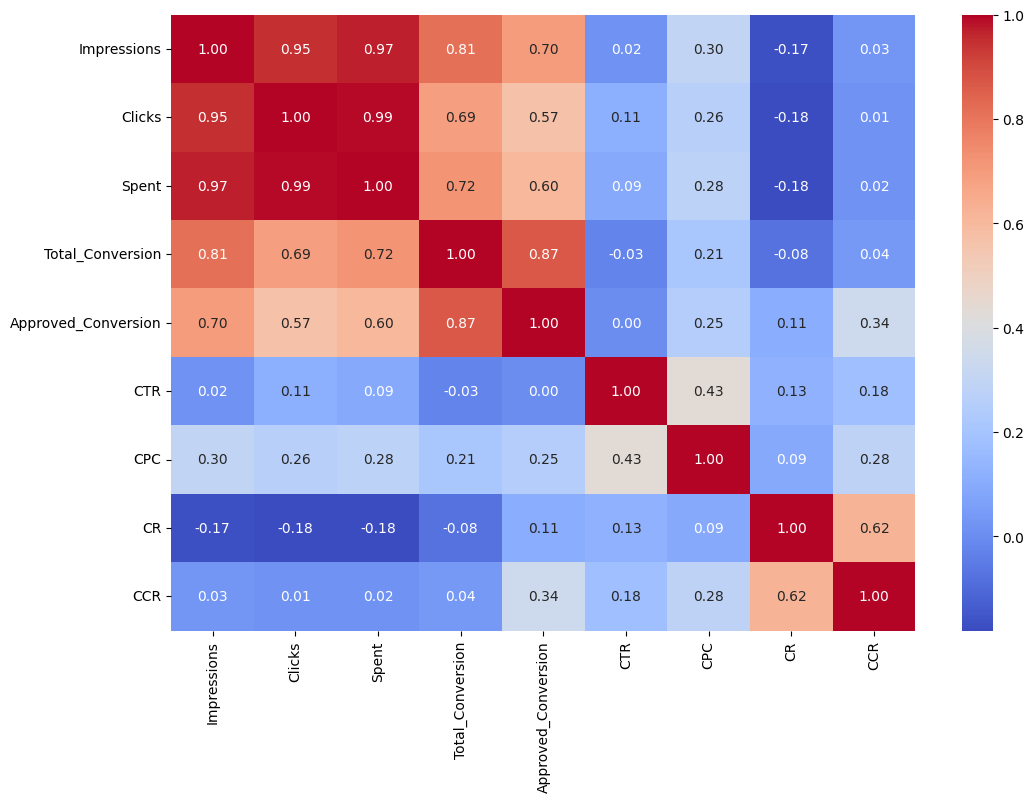

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it contains the necessary columns.
columns = ['Impressions', 'Clicks', 'Spent', 'Total_Conversion',
           'Approved_Conversion', 'CTR', 'CPC', 'CR', 'CCR']
data = df[columns]
correlation_matrix = data.corr()
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
svm = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=correlation_matrix.columns,
            yticklabels=correlation_matrix.columns)

# Show plot
plt.show()
figure = svm.get_figure()
figure.savefig('Overall-heatmap.png', dpi=400, bbox_inches='tight')

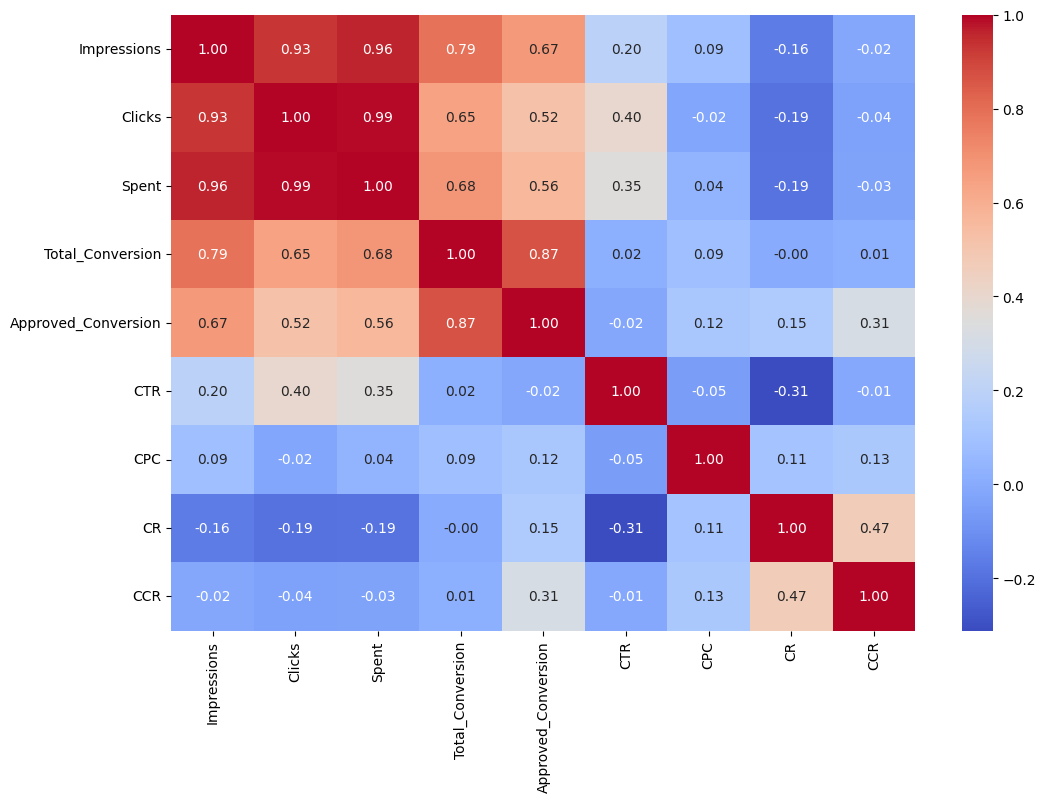

In [7]:
df_campaign = df[df['xyz_campaign_id'] == 1178]
data = df_campaign[columns]
correlation_matrix = data.corr()
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
svm = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=correlation_matrix.columns,
            yticklabels=correlation_matrix.columns)

# Show plot
plt.show()
figure = svm.get_figure()
figure.savefig('1178-heatmap.png', dpi=400, bbox_inches='tight')

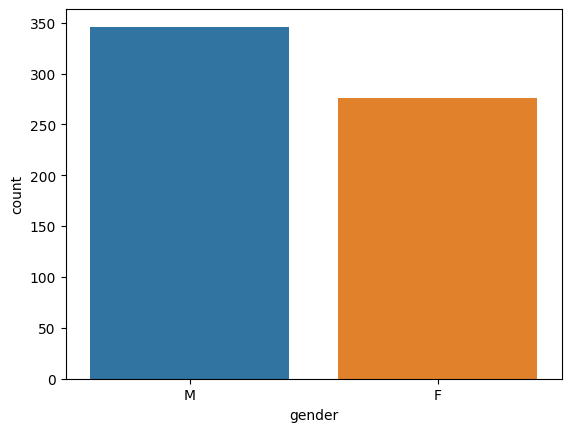

In [8]:
plot = sns.countplot(x='gender', data=df_campaign)

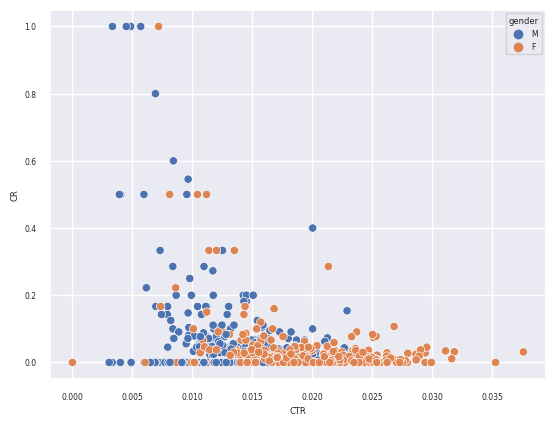

In [47]:
plot = sns.scatterplot(df_campaign, x='CTR', y='CR', hue='gender', sizes=0.1)
figure = plot.get_figure()
figure.savefig('gender_scatter.png', dpi=400, bbox_inches='tight')

In [17]:
df_campaign.groupby('gender')[columns].mean()

,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,CR,CCR
gender,,,,,,,,,
F,392665.072464,80.409420,116.131920,4.789855,1.416667,0.019752,1.441820,0.035970,0.295152
M,278622.210983,40.101156,68.236243,3.884393,1.381503,0.013545,1.635828,0.063696,0.341360


In [79]:
df_campaign.age.value_counts()

age
30-34    198
45-49    148
35-39    147
40-44    129
Name: count, dtype: int64

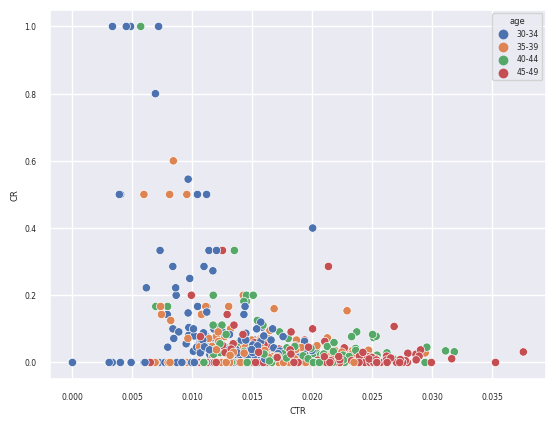

In [48]:
plot = sns.scatterplot(df_campaign, x='CTR', y='CR', hue='age', sizes=0.1)
figure = plot.get_figure()
figure.savefig('age_scatter.png', dpi=400, bbox_inches='tight')

In [80]:
df_campaign.groupby('age')[columns].mean()

,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,CR,CCR
age,,,,,,,,,
30-34,333507.712121,46.161616,74.674899,5.909091,1.979798,0.012085,1.575468,0.085404,0.309000
35-39,278312.197279,46.272109,72.825578,3.517007,1.136054,0.015464,1.569919,0.044568,0.333410
40-44,297199.480620,57.449612,86.221085,3.356589,1.093023,0.018955,1.513412,0.040679,0.359358
45-49,401984.405405,85.912162,128.707027,3.689189,1.141892,0.020452,1.526944,0.022009,0.290689


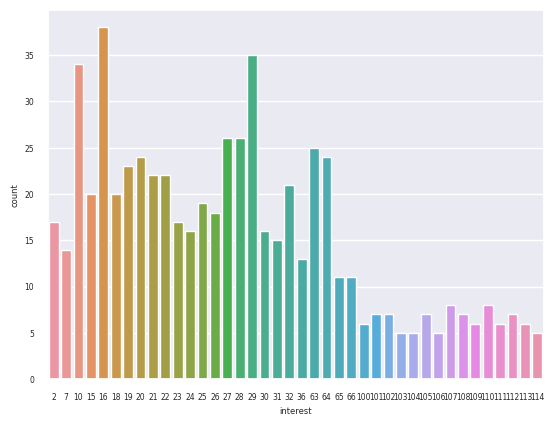

In [55]:
sns.set(font_scale=0.5)
plot = sns.countplot(df_campaign, x='interest')
figure = plot.get_figure()
figure.savefig('interest_count.png', dpi=400, bbox_inches='tight')

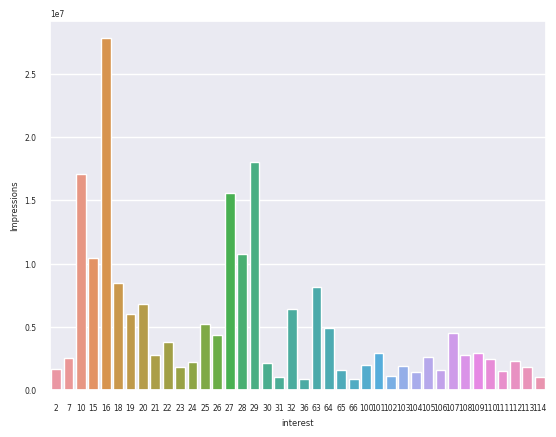

In [56]:
plot = sns.barplot(df_campaign.groupby('interest', as_index=False).sum(), x='interest', y='Impressions')
figure = plot.get_figure()
figure.savefig('impressions_sum.png', dpi=400, bbox_inches='tight')

In [69]:
df = df_campaign[df_campaign['interest'].isin([10, 16, 27, 29])].groupby('interest')[columns].mean()
df["CTR"] = df["Clicks"]/df["Impressions"] * 100 #click through rate
df["CPC"] = df["Spent"] /df["Clicks"] # cost per click
df["CR"] = df["Approved_Conversion"] / df["Clicks"]
df["CCR"] = df['Approved_Conversion'] / df['Total_Conversion']
df

,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,CR,CCR
interest,,,,,,,,,
10,501539.029412,90.500000,139.557059,6.352941,1.970588,0.018044,1.542067,0.021774,0.310185
16,731497.000000,112.921053,179.645000,7.210526,2.657895,0.015437,1.590890,0.023538,0.368613
27,600583.153846,123.846154,187.056153,7.730769,1.653846,0.020621,1.510391,0.013354,0.213930
29,514410.857143,88.828571,136.213715,7.257143,3.142857,0.017268,1.533445,0.035381,0.433071


In [8]:
df_new = df_campaign[df_campaign['interest'] == 29].groupby(['gender', 'age'], as_index=False)[columns].mean()

In [ ]:
df_new

In [9]:
df = df_campaign[df_campaign['interest'] == 29].groupby(['gender', 'age'], as_index=False)[columns].mean()
df["CTR"] = df["Clicks"]/df["Impressions"] * 100 #click through rate
df["CPC"] = df["Spent"] /df["Clicks"] # cost per click
df["CR"] = df["Approved_Conversion"] / df["Clicks"]
df["CCR"] = df['Approved_Conversion'] / df['Total_Conversion']

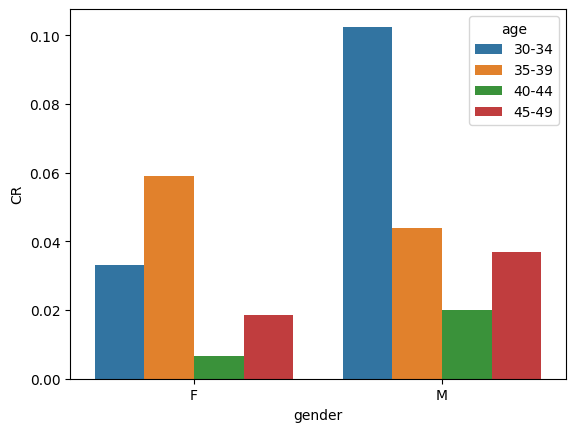

In [17]:
import seaborn as sns
plot = sns.barplot(df, x='gender', y='CR', hue='age')
figure = plot.get_figure()
figure.savefig('final.png', dpi=400, bbox_inches='tight')